In [128]:
# Global Imports
import numpy as np   
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt   # plotting
from sklearn.model_selection import train_test_split  # ML data splits
from sklearn.preprocessing import MinMaxScaler # ML preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


#Set seed
np.random.seed(1234) 

# Import model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, mean_squared_error

#feature importance
from sklearn.inspection import permutation_importance

In [41]:
#Import dataset
df = pd.read_csv("C:/Users/kimng/Desktop/EDPY506/Final Project/data_filtered.csv", low_memory=False)
df = df.reset_index(drop=True)
df.describe()

,Unnamed: 0,pnrnmlif,CATAG6,NEWRACE2,irsex,sexident,IREDUHIGHST2,irwrkstat,IRPINC3,COUTYP4,...,RaceEth_black,RaceEth_native,RaceEth_islander,RaceEth_asian,RaceEth_multi,RaceEth_hisp,wrkstat_empfull,wrkstat_emppart,wrkstat_unemp,wrkstat_other
count,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,...,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000,26941.000000
mean,16832.251884,0.101370,3.539809,2.347983,0.551390,5.818455,9.403734,2.101073,3.792064,0.822093,...,0.089640,0.008166,0.004157,0.056791,0.036116,0.136966,0.512861,0.151776,0.056791,0.278572
std,9554.786383,0.301823,1.311145,2.255034,0.497361,20.622195,1.716028,1.293749,2.230243,0.382442,...,0.285671,0.089998,0.064344,0.231447,0.186582,0.343818,0.499844,0.358810,0.231447,0.448305
min,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8564.000000,0.000000,2.000000,1.000000,0.000000,1.000000,8.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17057.000000,0.000000,3.000000,1.000000,1.000000,1.000000,9.000000,1.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,25181.000000,0.000000,4.000000,2.000000,1.000000,1.000000,11.000000,4.000000,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,32892.000000,1.000000,6.000000,7.000000,1.000000,98.000000,11.000000,4.000000,7.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
#check for class imbalance
df.pnrnmlif.value_counts()


0    24210
1     2731
Name: pnrnmlif, dtype: int64

Since the data is imbalanced, undersampling of the majority class will be performed to achieve a balanced data

In [135]:
# Divide by class
class_1 = df[df['pnrnmlif'] == 1]
class_0 = df[df['pnrnmlif'] == 0]

# Split the negative cases so we can get a random subsample of N = 2731 (similar sample to the positive class)
class_0_exclude, class_0_include = train_test_split(class_0, test_size = 2731, random_state = 42, shuffle = True)

# Combined the positive and negative cases to get a balanced dataset
data = pd.concat([class_1,class_0_include])

#check for class imbalance
data.pnrnmlif.value_counts()

#reset index -- this is to replace old data index with index based on current data.
data = data.reset_index(drop=True)

In [50]:
filepath = "C:/Users/kimng/Desktop/EDPY506/Final Project/data_final.csv"
data.to_csv(filepath) 

## Initialize Classifiers

In [6]:
adaBoost = AdaBoostClassifier(random_state=42)
gradientBoost = GradientBoostingClassifier(random_state=42)

## Set up the parameter grids

In [17]:
param_grid_ada = {'learning_rate': np.arange(0.1, 1.1, .1),
                  'n_estimators': np.arange(50, 101, 5)}

param_grid_gradient = {'learning_rate': np.arange(0.1, 1.1, .1),
                       'n_estimators': np.arange(50, 101, 5)}


### Set up GridSearchCV

In [18]:
search_ada = GridSearchCV(estimator=adaBoost, 
                      param_grid = param_grid_ada,
                      scoring = 'accuracy',
                      cv = 3, 
                      n_jobs = 1, 
                      refit = True)

search_gradient = GridSearchCV(estimator=gradientBoost, 
                      param_grid = param_grid_gradient,
                      scoring = 'accuracy',
                      cv = 3, 
                      n_jobs = 1, 
                      refit = True)

### Nested Cross Validation procedure

#### AdaBoost 


 Fold  1

        Best accuracy (across all inner validation folds): 0.6962687706939595
        Best parameters: {'learning_rate': 0.2, 'n_estimators': 50}
        Accuracy (on outer train set) 0.6987869077592126
        Precision (on outer train set) 0.7246376811594203
        Recall (on outer train set) 0.6410256410256411
        F1 score (on outer train set) 0.6802721088435374
        ROC AUC score (on outer train set) 0.765702508780312
        RMSE (on outer test set) 0.5488288369253089

        Accuracy (on outer test set) 0.6797804208600183
        Precision (on outer test set) 0.7047817047817048
        Recall (on outer test set) 0.6197440585009141
        F1 Score (on outer test set) 0.6595330739299611
        ROC AUC Score (on outer test set) 0.7493018864134038
        RMSE (on outer test set) 0.565879474040172

 Fold  2

        Best accuracy (across all inner validation folds): 0.6985603477967924
        Best parameters: {'learning_rate': 0.2, 'n_estimators': 50}
        Ac

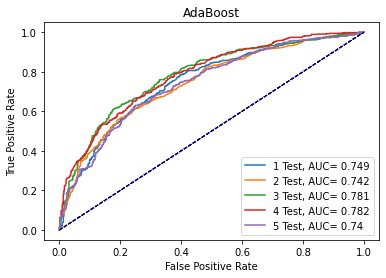

In [130]:
# Empty list to store evaluation metrics
ada_outer_train_accuracy = []
ada_outer_train_roc_auc_score = []
ada_outer_train_precision = []
ada_outer_train_recall = []
ada_outer_train_f1= []
ada_outer_train_rmse =[]

ada_outer_test_accuracy = []
ada_outer_test_roc_auc_score = []
ada_outer_test_precision = []
ada_outer_test_recall = []
ada_outer_test_f1= []
ada_outer_test_rmse =[]

ada_importance_df = pd.DataFrame()

# configure the cross-validation procedure
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 
fold_no = 1

# Loop through each outer CV fold
for train_index_outer, test_index_outer in outer_cv.split(data, data.pnrnmlif):
    train_set = data.loc[train_index_outer,:]
    test_set = data.loc[test_index_outer,:]

    feature_names = ['CATAG6', 'RaceEth_white', 'RaceEth_black', 'RaceEth_native','RaceEth_islander', 
                 'RaceEth_asian', 'RaceEth_multi', 'RaceEth_hisp', 'irsex', 'IREDUHIGHST2', 
                 'wrkstat_empfull', 'wrkstat_emppart', 'wrkstat_unemp', 'wrkstat_other',
                 'IRPINC3', 'COUTYP4', 'health',
                 'IRINSUR4', 'hltinmnt', 'hltinalc', 'hltindrg', 
                 'WHODASC2', 'spdyr', 'mhsuithk','UDYR5ILAL', 'amdelt'
                ]
    target = ['pnrnmlif']

    X_train = train_set[feature_names]
    y_train = train_set[target].values.ravel()
    X_test = test_set[feature_names]
    y_test = test_set[target].values.ravel()
            
    #Apply grid search with CV=3 on outer train_set (this is hyperparameter tuning process within the inner loop)
    search_ada.fit(X_train, y_train) # run inner loop hyperparam tuning
    
    print('\n Fold ', fold_no)
    fold_no=fold_no +1
    
    print('\n        Best accuracy (across all inner validation folds):', abs(search_ada.best_score_))
    print('        Best parameters:', search_ada.best_params_)
    
    #Best model
    best_model = search_ada.best_estimator_
    
    #Predict train set
    y_train_hat = best_model.predict(X_train)
    
    #Evaluation scores
    ## Accuracy
    accuracy_train = accuracy_score(y_train, y_train_hat)
    ada_outer_train_accuracy.append(accuracy_train)
    print('        Accuracy (on outer train set)', (accuracy_train))
    
    ## Precision
    precision_train = precision_score(y_train, y_train_hat)
    ada_outer_train_precision.append(precision_train)
    print('        Precision (on outer train set)', (precision_train))
    
    ## Recall
    recall_train = recall_score(y_train, y_train_hat)
    ada_outer_train_recall.append(recall_train)
    print('        Recall (on outer train set)', (recall_train))
       
    ## F1
    f1_train = f1_score(y_train, y_train_hat)
    ada_outer_train_f1.append(f1_train)
    print('        F1 score (on outer train set)', (f1_train))
       
    ## ROC AUC
    y_train_proba = best_model.predict_proba(X_train)[:,1]
    auc_train = roc_auc_score(y_train, y_train_proba)
    ada_outer_train_roc_auc_score.append(auc_train)
    print('        ROC AUC score (on outer train set)', (auc_train))
    
    ## RMSE
    rmse_train = mean_squared_error(y_train, y_train_hat)**0.5
    ada_outer_train_rmse.append(rmse_train)
    print('        RMSE (on outer test set)', (rmse_train))
    
    # Calculate evaluation metrics using best-tuned model on the outer test_set  
    
    #Predict test set
    y_test_hat = best_model.predict(X_test)
    
    ## Accuracy
    accuracy_test = accuracy_score(y_test, y_test_hat)
    ada_outer_test_accuracy.append(accuracy_test)
    print('\n        Accuracy (on outer test set)', (ada_outer_test_accuracy[-1]))
    
    ## Precision
    precision_test = precision_score(y_test, y_test_hat)
    ada_outer_test_precision.append(precision_test)
    print('        Precision (on outer test set)', (precision_test))
    
    ## Recall
    recall_test = recall_score(y_test, y_test_hat)
    ada_outer_test_recall.append(recall_test)
    print('        Recall (on outer test set)', (recall_test))
       
    ## F1
    f1_test = f1_score(y_test, y_test_hat)
    ada_outer_test_f1.append(f1_test)
    print('        F1 Score (on outer test set)', (f1_test))
       
    ## ROC AUC
    y_test_proba = best_model.predict_proba(X_test)[:,1]
    auc_test = roc_auc_score(y_test, y_test_proba)
    ada_outer_test_roc_auc_score.append(auc_test)
    print('        ROC AUC Score (on outer test set)', (auc_test))
    
    ## RMSE
    rmse_test = mean_squared_error(y_test, y_test_hat)**0.5
    ada_outer_test_rmse.append(rmse_test)
    print('        RMSE (on outer test set)', (rmse_test))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

    plt.plot(fpr,tpr, label=str(fold_no-1)+" Test, AUC= "+str(round(auc_test, 3)))
    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.title("AdaBoost")
        
    # perform permutation importance
    results = permutation_importance(best_model, X_test, y_test, random_state = 42, scoring = 'roc_auc')

    # get importance
    importance = results.importances_mean

    #Create df column for importanct
    column_name = 'Feature Importance '+ str(fold_no-1)
    ada_importance_df[column_name] = importance
    
# Print evaluation metrics across all outer loop folds
print('\n    Average performance on Outer Train:')
print('        Accuracy %.3f +/- %.3f'% (np.mean(ada_outer_train_accuracy), np.std(ada_outer_train_accuracy)))
print('        Precision %.3f +/- %.3f'% (np.mean(ada_outer_train_precision), np.std(ada_outer_train_precision)))
print('        Recall %.3f +/- %.3f'% (np.mean(ada_outer_train_recall), np.std(ada_outer_train_recall)))
print('        F1 Score %.3f +/- %.3f'% (np.mean(ada_outer_train_f1), np.std(ada_outer_train_f1)))
print('        ROC AUC Score %.3f +/- %.3f'% (np.mean(ada_outer_train_roc_auc_score), np.std(ada_outer_train_roc_auc_score)))
print('        RMSE %.3f +/- %.3f'% (np.mean(ada_outer_train_rmse), np.std(ada_outer_train_rmse)))

# Print evaluation metrics across all outer loop folds
print('\n    Average performance on Outer Test:')
print('        Accuracy %.3f +/- %.3f'% (np.mean(ada_outer_test_accuracy), np.std(ada_outer_test_accuracy)))
print('        Precision %.3f +/- %.3f'% (np.mean(ada_outer_test_precision), np.std(ada_outer_test_precision)))
print('        Recall %.3f +/- %.3f'% (np.mean(ada_outer_test_recall), np.std(ada_outer_test_recall)))
print('        F1 Score %.3f +/- %.3f'% (np.mean(ada_outer_test_f1), np.std(ada_outer_test_f1)))
print('        ROC AUC Score %.3f +/- %.3f'% (np.mean(ada_outer_test_roc_auc_score), np.std(ada_outer_test_roc_auc_score)))
print('        RMSE %.3f +/- %.3f'% (np.mean(ada_outer_test_rmse), np.std(ada_outer_test_rmse)))

plt.show()

In [174]:
#Feature Importance Dataframe

ada_importance_df = ada_importance_df.set_index(X_test.columns)
ada_importance_df["Mean Importance"] = ada_importance_df[['Feature Importance 1', 'Feature Importance 2', 'Feature Importance 3', 
                 'Feature Importance 4', 'Feature Importance 5']].mean(axis=1)
ada_importance_df["SD Importance"] = ada_importance_df[['Feature Importance 1', 'Feature Importance 2', 'Feature Importance 3', 
                 'Feature Importance 4', 'Feature Importance 5']].std(axis=1)


<AxesSubplot:>

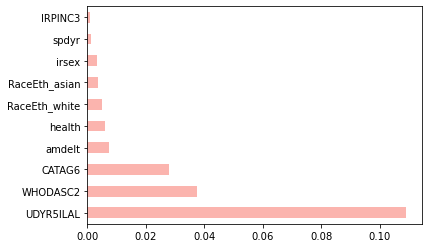

In [176]:
(pd.Series(ada_importance_df["Mean Importance"], index=X_test.columns)
     .nlargest(10)
     .plot(kind='barh', colormap = 'Pastel1'))

In [177]:
ada_importance_df['feature_name'] = 

,Feature Importance 1,Feature Importance 2,Feature Importance 3,Feature Importance 4,Feature Importance 5,Mean Importance,SD Importance
CATAG6,0.027831,0.023842,0.029700,0.028360,0.029485,0.027844,0.002368
RaceEth_white,0.006800,0.005151,0.004505,0.005482,0.003676,0.005123,0.001164
RaceEth_black,0.000000,0.000000,0.000000,0.000000,0.000208,0.000042,0.000093
RaceEth_native,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RaceEth_islander,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RaceEth_asian,0.003997,0.004183,0.002301,0.004879,0.002281,0.003528,0.001176
RaceEth_multi,0.000000,0.000000,0.000000,0.000000,0.000050,0.000010,0.000023
RaceEth_hisp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
irsex,0.003762,0.000487,0.002993,0.003522,0.005757,0.003304,0.001891
IREDUHIGHST2,0.000305,0.000000,0.000918,0.000373,0.000248,0.000369,0.000338


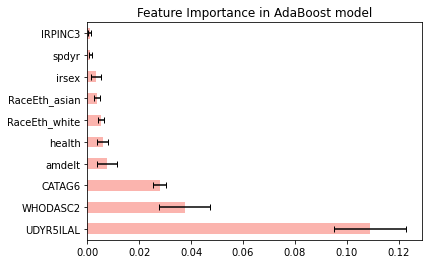

In [191]:
#Sort by importance
ada_importance_sorted = ada_importance_df.sort_values(by=["Mean Importance"], ascending = False)

s = (pd.Series(ada_importance_df["Mean Importance"], index=X_test.columns)).nlargest(10)
err = ada_importance_sorted["SD Importance"][0:10]
plt.figure()
s.plot(kind='barh', xerr=err, capsize=3, colormap = 'Pastel1')
plt.title('Feature Importance in AdaBoost model')
plt.show()

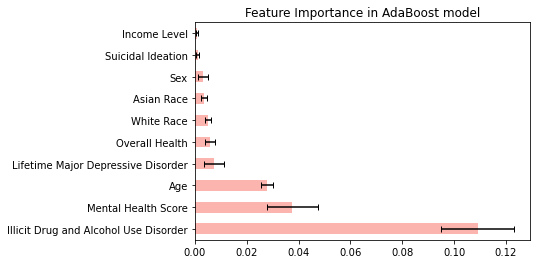

In [192]:
s = (pd.Series(ada_importance_df["Mean Importance"], index=X_test.columns)).nlargest(10)
err = ada_importance_sorted["SD Importance"][0:10]

ls = ['Illicit Drug and Alcohol Use Disorder', 'Mental Health Score',  'Age', 'Lifetime Major Depressive Disorder',
     'Overall Health', 'White Race', 'Asian Race', 'Sex', 'Suicidal Ideation', 'Income Level']
y_pos = np.arange(len(s))

plt.figure()
s.plot(kind='barh', xerr=err, capsize=3, colormap = 'Pastel1')
plt.yticks(y_pos, ls)
plt.title('Feature Importance in AdaBoost model')
plt.show()

In [181]:
ada_importance_sorted

,Feature Importance 1,Feature Importance 2,Feature Importance 3,Feature Importance 4,Feature Importance 5,Mean Importance,SD Importance
UDYR5ILAL,0.116937,0.102956,0.126925,0.108286,0.090098,0.109040,0.013952
WHODASC2,0.042934,0.037448,0.049671,0.034402,0.023389,0.037569,0.009828
CATAG6,0.027831,0.023842,0.029700,0.028360,0.029485,0.027844,0.002368
amdelt,0.007920,0.006270,0.013820,0.005129,0.004123,0.007452,0.003829
health,0.003771,0.004811,0.005500,0.006012,0.009252,0.005869,0.002069
RaceEth_white,0.006800,0.005151,0.004505,0.005482,0.003676,0.005123,0.001164
RaceEth_asian,0.003997,0.004183,0.002301,0.004879,0.002281,0.003528,0.001176
irsex,0.003762,0.000487,0.002993,0.003522,0.005757,0.003304,0.001891
spdyr,0.000605,0.001537,0.001858,0.001244,0.000346,0.001118,0.000632
IRPINC3,0.001337,0.000000,0.000889,0.001310,0.000716,0.000850,0.000546


#### Gradient Boosting 


 Fold  1

        Best accuracy (across all inner validation folds): 0.6969541697149797
        Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
        Accuracy (on outer train set) 0.7100022888532845
        Precision (on outer train set) 0.7312153303076148
        Recall (on outer train set) 0.6639194139194139
        F1 score (on outer train set) 0.6959443244540438
        ROC AUC score (on outer train set) 0.7856517338496745
        RMSE (on outer test set) 0.5385143555623336

        Accuracy (on outer test set) 0.6980786825251601
        Precision (on outer test set) 0.716566866267465
        Recall (on outer test set) 0.6563071297989032
        F1 Score (on outer test set) 0.6851145038167938
        ROC AUC Score (on outer test set) 0.7599845310082971
        RMSE (on outer test set) 0.5494736731407974

 Fold  2

        Best accuracy (across all inner validation folds): 0.6990161805707448
        Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
        A

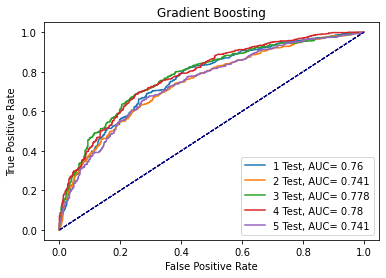

In [146]:
# Empty list to store evaluation metrics
gb_outer_train_accuracy = []
gb_outer_train_roc_auc_score = []
gb_outer_train_precision = []
gb_outer_train_recall = []
gb_outer_train_f1= []
gb_outer_train_rmse = []

gb_outer_test_accuracy = []
gb_outer_test_roc_auc_score = []
gb_outer_test_precision = []
gb_outer_test_recall = []
gb_outer_test_f1= []
gb_outer_test_rmse = []

gb_importance_df = pd.DataFrame()

# configure the cross-validation procedure
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 
fold_no=1

# Loop through each outer CV fold
for train_index_outer, test_index_outer in outer_cv.split(data, data.pnrnmlif):
    train_set = data.loc[train_index_outer,:]
    test_set = data.loc[test_index_outer,:]

    feature_names = ['CATAG6', 'RaceEth_white', 'RaceEth_black', 'RaceEth_native','RaceEth_islander', 
                 'RaceEth_asian', 'RaceEth_multi', 'RaceEth_hisp', 'irsex', 'IREDUHIGHST2', 
                 'wrkstat_empfull', 'wrkstat_emppart', 'wrkstat_unemp', 'wrkstat_other',
                 'IRPINC3', 'COUTYP4', 'health',
                 'IRINSUR4', 'hltinmnt', 'hltinalc', 'hltindrg', 
                 'WHODASC2', 'spdyr', 'mhsuithk','UDYR5ILAL', 'amdelt'
                ]
    target = ['pnrnmlif']

    X_train = train_set[feature_names]
    y_train = train_set[target].values.ravel()
    X_test = test_set[feature_names]
    y_test = test_set[target].values.ravel()
            
    #Apply grid search with CV=3 on outer train_set (this is hyperparameter tuning process within the inner loop)
    search_gradient.fit(X_train, y_train) # run inner loop hyperparam tuning
    
    print('\n Fold ', fold_no)
    fold_no=fold_no +1
    
    print('\n        Best accuracy (across all inner validation folds):', abs(search_gradient.best_score_))
    print('        Best parameters:', search_gradient.best_params_)
    
    #Best model
    best_model = search_gradient.best_estimator_
    
    #Predict train set
    y_train_hat = best_model.predict(X_train)
    
    #Evaluation scores
    ## Accuracy
    accuracy_train = accuracy_score(y_train, y_train_hat)
    gb_outer_train_accuracy.append(accuracy_train)
    print('        Accuracy (on outer train set)', (accuracy_train))
    
    ## Precision
    precision_train = precision_score(y_train, y_train_hat)
    gb_outer_train_precision.append(precision_train)
    print('        Precision (on outer train set)', (precision_train))
    
    ## Recall
    recall_train = recall_score(y_train, y_train_hat)
    gb_outer_train_recall.append(recall_train)
    print('        Recall (on outer train set)', (recall_train))
       
    ## F1
    f1_train = f1_score(y_train, y_train_hat)
    gb_outer_train_f1.append(f1_train)
    print('        F1 score (on outer train set)', (f1_train))
       
    ## ROC AUC
    y_train_proba = best_model.predict_proba(X_train)[:,1]
    auc_train = roc_auc_score(y_train, y_train_proba)
    gb_outer_train_roc_auc_score.append(auc_train)
    print('        ROC AUC score (on outer train set)', (auc_train))
    
    ## RMSE
    rmse_train = mean_squared_error(y_train, y_train_hat)**0.5
    gb_outer_train_rmse.append(rmse_train)
    print('        RMSE (on outer train set)', (rmse_train))
    
    # Calculate evaluation metrics using best-tuned model on the outer test_set  
    
    #Predict test set
    y_test_hat = best_model.predict(X_test)
    
    ## Accuracy
    accuracy_test = accuracy_score(y_test, y_test_hat)
    gb_outer_test_accuracy.append(accuracy_test)
    print('\n        Accuracy (on outer test set)', (gb_outer_test_accuracy[-1]))
    
    ## Precision
    precision_test = precision_score(y_test, y_test_hat)
    gb_outer_test_precision.append(precision_test)
    print('        Precision (on outer test set)', (precision_test))
    
    ## Recall
    recall_test = recall_score(y_test, y_test_hat)
    gb_outer_test_recall.append(recall_test)
    print('        Recall (on outer test set)', (recall_test))
       
    ## F1
    f1_test = f1_score(y_test, y_test_hat)
    gb_outer_test_f1.append(f1_test)
    print('        F1 Score (on outer test set)', (f1_test))
       
    ## ROC AUC
    y_test_proba = best_model.predict_proba(X_test)[:,1]
    auc_test = roc_auc_score(y_test, y_test_proba)
    gb_outer_test_roc_auc_score.append(auc_test)
    print('        ROC AUC Score (on outer test set)', (auc_test))
            
    ## RMSE
    rmse_test = mean_squared_error(y_test, y_test_hat)**0.5
    gb_outer_test_rmse.append(rmse_test)
    print('        RMSE (on outer test set)', (rmse_test))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

    plt.plot(fpr,tpr, label=str(fold_no-1)+" Test, AUC= "+str(round(auc_test, 3)))
    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.title("Gradient Boosting")
    
            
    # perform permutation importance
    results = permutation_importance(best_model, X_test, y_test, random_state = 42, scoring = 'roc_auc')

    # get importance
    importance = results.importances_mean

    #Create df column for importanct
    column_name = 'Feature Importance '+ str(fold_no-1)
    gb_importance_df[column_name] = importance
    
# Print evaluation metrics across all outer loop folds
print('\n    Average performance on Outer Train:')
print('        Accuracy %.3f +/- %.3f'% (np.mean(gb_outer_train_accuracy), np.std(gb_outer_train_accuracy)))
print('        Precision %.3f +/- %.3f'% (np.mean(gb_outer_train_precision), np.std(gb_outer_train_precision)))
print('        Recall %.3f +/- %.3f'% (np.mean(gb_outer_train_recall), np.std(gb_outer_train_recall)))
print('        F1 Score %.3f +/- %.3f'% (np.mean(gb_outer_train_f1), np.std(gb_outer_train_f1)))
print('        ROC AUC Score %.3f +/- %.3f'% (np.mean(gb_outer_train_roc_auc_score), np.std(gb_outer_train_roc_auc_score)))
print('        RMSE %.3f +/- %.3f'% (np.mean(gb_outer_train_rmse), np.std(gb_outer_train_rmse)))

# Print evaluation metrics across all outer loop folds
print('\n    Average performance on Outer Test:')
print('        Accuracy %.3f +/- %.3f'% (np.mean(gb_outer_test_accuracy), np.std(gb_outer_test_accuracy)))
print('        Precision %.3f +/- %.3f'% (np.mean(gb_outer_test_precision), np.std(gb_outer_test_precision)))
print('        Recall %.3f +/- %.3f'% (np.mean(gb_outer_test_recall), np.std(gb_outer_test_recall)))
print('        F1 Score %.3f +/- %.3f'% (np.mean(gb_outer_test_f1), np.std(gb_outer_test_f1)))
print('        ROC AUC Score %.3f +/- %.3f'% (np.mean(gb_outer_test_roc_auc_score), np.std(gb_outer_test_roc_auc_score)))
print('        RMSE %.3f +/- %.3f'% (np.mean(gb_outer_test_rmse), np.std(gb_outer_test_rmse)))
                                     
plt.show()

In [147]:
#Feature Importance Dataframe

gb_importance_df = gb_importance_df.set_index(X_test.columns)
gb_importance_df["Mean Importance"] = gb_importance_df[['Feature Importance 1', 'Feature Importance 2', 'Feature Importance 3', 
                 'Feature Importance 4', 'Feature Importance 5']].mean(axis=1)
gb_importance_df["SD Importance"] = gb_importance_df[['Feature Importance 1', 'Feature Importance 2', 'Feature Importance 3', 
                 'Feature Importance 4', 'Feature Importance 5']].std(axis=1)

In [148]:
gb_importance_df

,Feature Importance 1,Feature Importance 2,Feature Importance 3,Feature Importance 4,Feature Importance 5,Mean Importance,SD Importance
CATAG6,0.033309,0.025405,0.030296,0.027144,0.028816,0.028994,0.003027
RaceEth_white,0.005185,0.004192,0.002253,0.008669,0.004424,0.004945,0.002346
RaceEth_black,0.001022,-0.000362,-0.000024,0.000048,0.000541,0.000245,0.000541
RaceEth_native,-0.000008,0.000006,0.000855,0.000000,0.000072,0.000185,0.000376
RaceEth_islander,0.000133,0.000000,0.000416,0.000000,0.000000,0.000110,0.000181
RaceEth_asian,0.007008,0.003094,0.000026,0.004767,-0.000208,0.002938,0.003095
RaceEth_multi,-0.000476,-0.000105,-0.000350,0.000372,0.000011,-0.000110,0.000331
RaceEth_hisp,-0.000027,0.000000,-0.000596,-0.000258,-0.000134,-0.000203,0.000242
irsex,0.005560,0.000674,0.004968,0.003379,0.004986,0.003913,0.001985
IREDUHIGHST2,0.002052,0.002575,0.001729,0.001489,0.000554,0.001680,0.000750


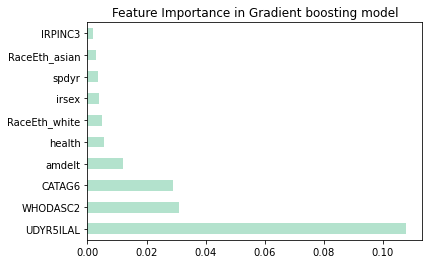

In [154]:
(pd.Series(gb_importance_df["Mean Importance"], index=X_test.columns)
     .nlargest(10)
     .plot(kind='barh', colormap = 'Pastel2'))
#plt.bar(gb_importance_df["Mean Importance"], X_test.columns, yerr=gb_importance_df["SD Importance"], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.title('Feature Importance in Gradient boosting model')
plt.show()

In [168]:
#Sort by importance
gb_importance_sorted = gb_importance_df.sort_values(by=["Mean Importance"], ascending = False)
gb_importance_sorted["SD Importance"][0:10]

UDYR5ILAL        0.008083
WHODASC2         0.007221
CATAG6           0.003027
amdelt           0.004724
health           0.002356
RaceEth_white    0.002346
irsex            0.001985
spdyr            0.002239
RaceEth_asian    0.003095
IRPINC3          0.001768
Name: SD Importance, dtype: float64

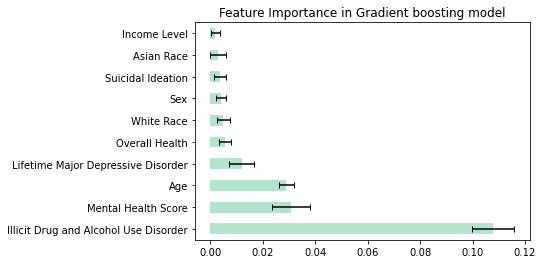

In [188]:
s = (pd.Series(gb_importance_df["Mean Importance"], index=X_test.columns)).nlargest(10)
err = gb_importance_sorted["SD Importance"][0:10]

ls = ['Illicit Drug and Alcohol Use Disorder', 'Mental Health Score',  'Age', 'Lifetime Major Depressive Disorder',
     'Overall Health', 'White Race', 'Sex', 'Suicidal Ideation', 'Asian Race', 'Income Level']
y_pos = np.arange(len(s))

plt.figure()
s.plot(kind='barh', xerr=err, capsize=3, colormap = 'Pastel2')
plt.yticks(y_pos, ls)
plt.title('Feature Importance in Gradient boosting model')
plt.show()